# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

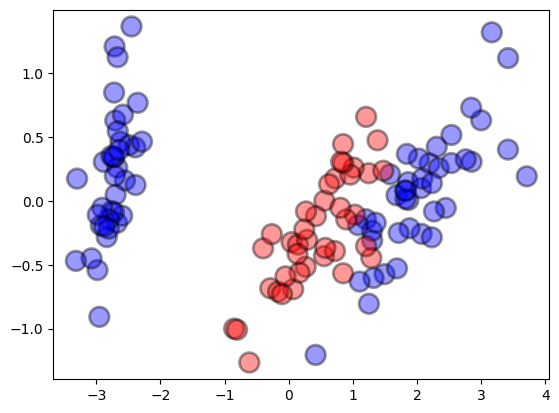

In [2]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


original


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


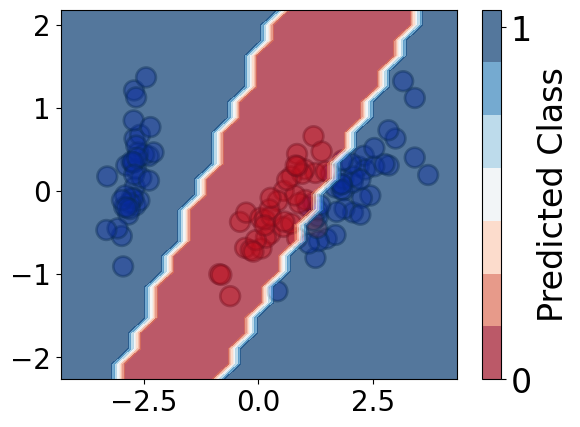

SMOTE


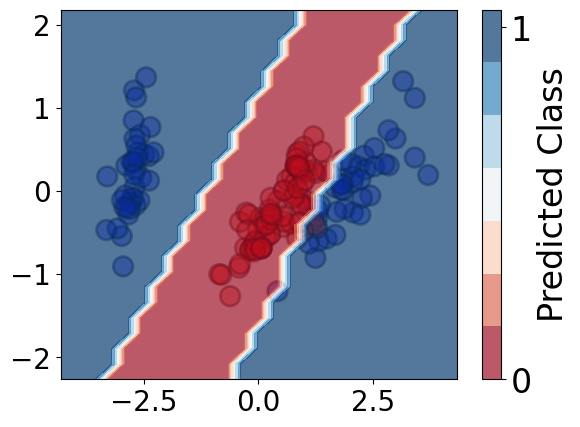

balanced_weights


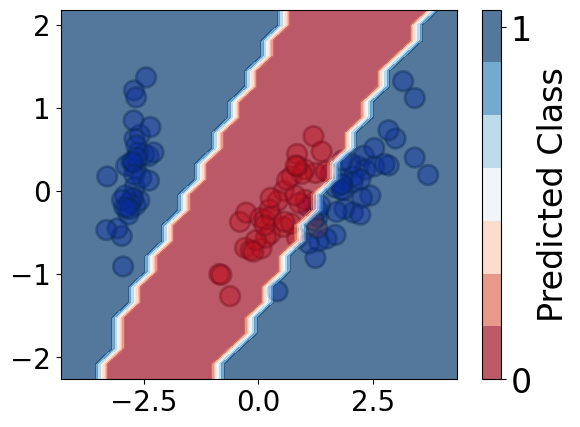

Bayes Minimum Risk


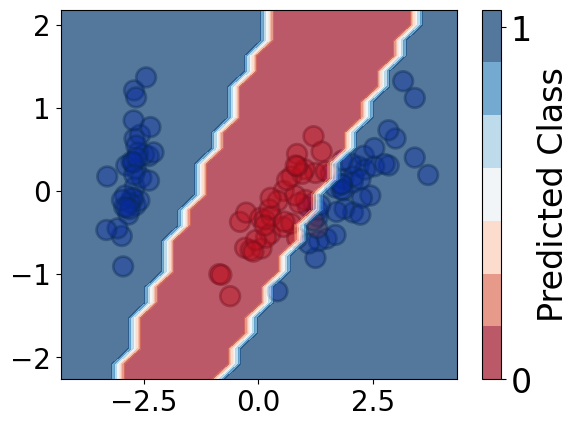

Bayes Minimum Risk (Not calibrated)


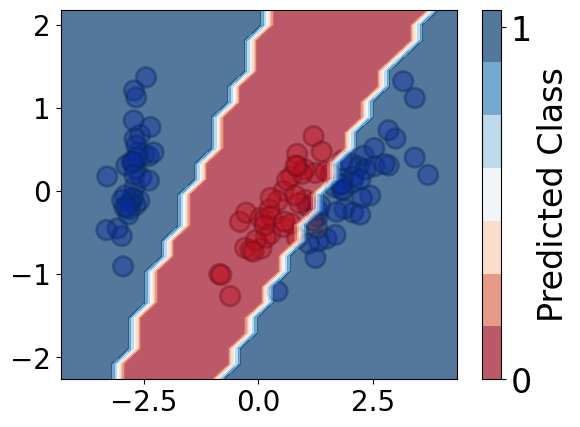

Thresholding


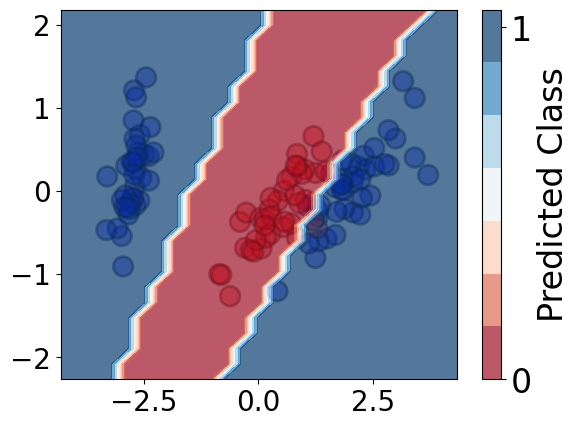

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

balance_clf = True
balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

data_clf['clf'] = classifiers_dict['original']

## Fit deltas

Original Data


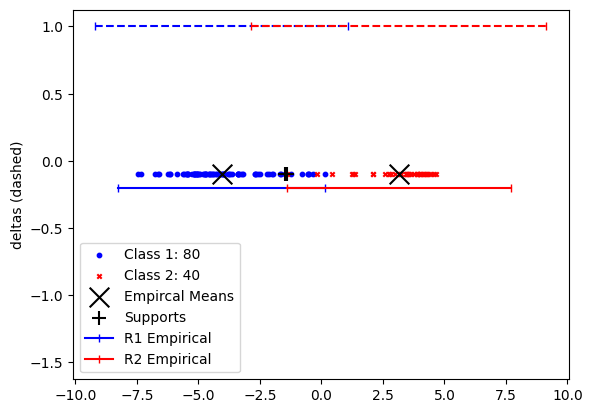

Budget 118 found 41 viable downsampled solutions
Best solution found by removing 17 data points
Downsampled Data:


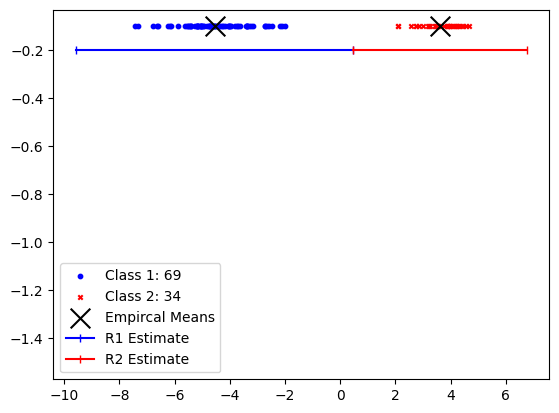

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=0,
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=1000, 
                                                     method='supports-prop-update_mean-margin_only',
                                                     parallel=True)

## Plot training data information

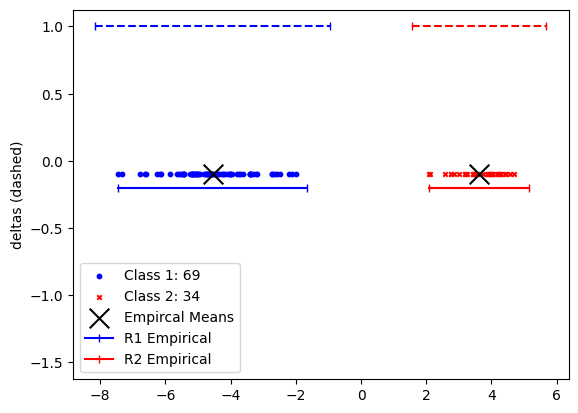

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [6]:
deltas_model.print_params()

Parameters
                R:  7.446566647852668
                N1: 69
                N2: 34
                R1: 2.8930242210622037
                R2: 1.536706904334356
                M:  3.7424492989004405
                D:  8.172180424297
                C1: 1
                C2: 1


# Evaluation on test data

                                     accuracy    G-Mean  ROC-AUC  \
Method                                                             
original                             1.000000  1.000000    1.000   
SMOTE                                1.000000  1.000000    1.000   
balanced_weights                     1.000000  1.000000    1.000   
Bayes Minimum Risk                   0.966667  0.974679    0.975   
Bayes Minimum Risk (Not calibrated)  0.966667  0.974679    0.975   
Thresholding                         0.966667  0.974679    0.975   
deltas                               1.000000  1.000000    1.000   

                                     precision1 (red)  precision2 (blue)  \
Method                                                                     
original                                          1.0           1.000000   
SMOTE                                             1.0           1.000000   
balanced_weights                                  1.0           1.000000   
Bayes M

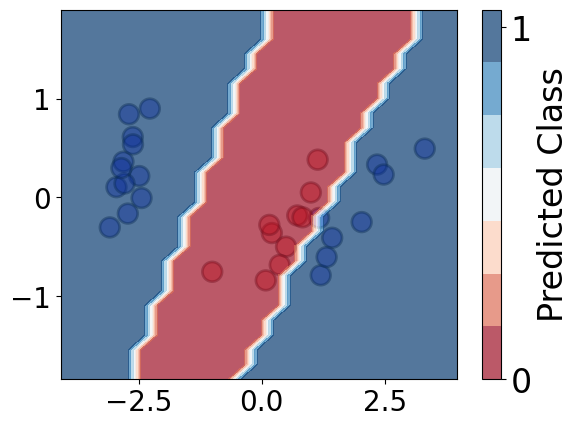

SMOTE


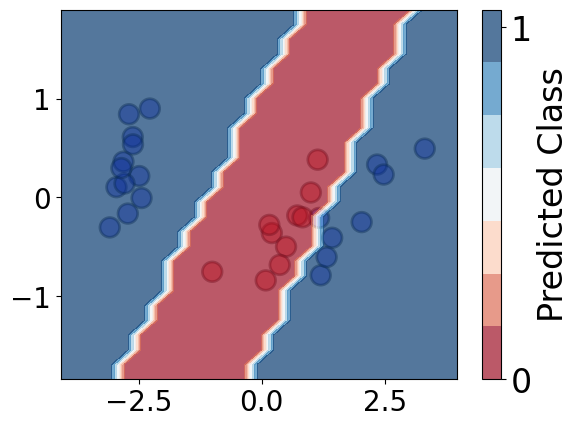

balanced_weights


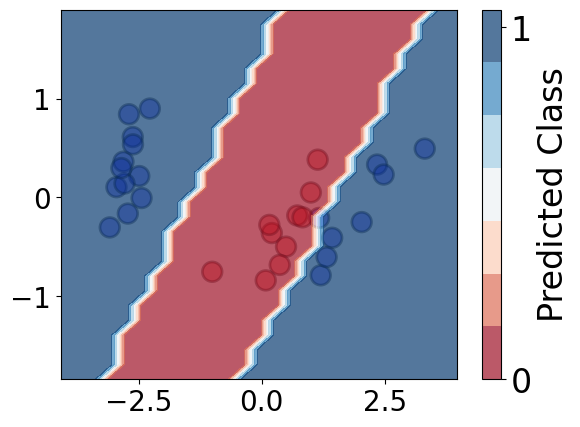

Bayes Minimum Risk


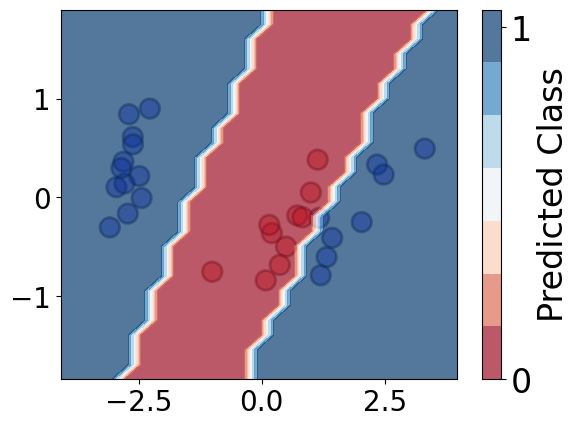

Bayes Minimum Risk (Not calibrated)


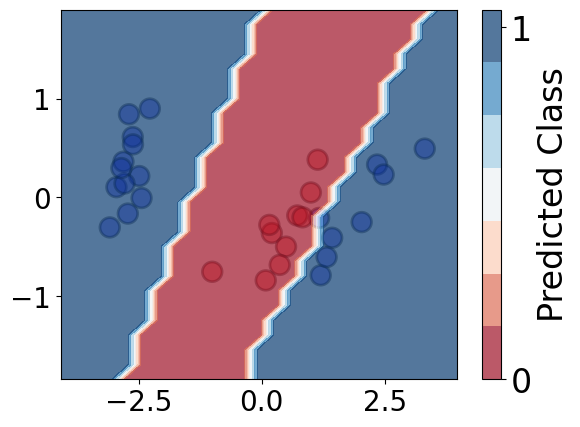

Thresholding


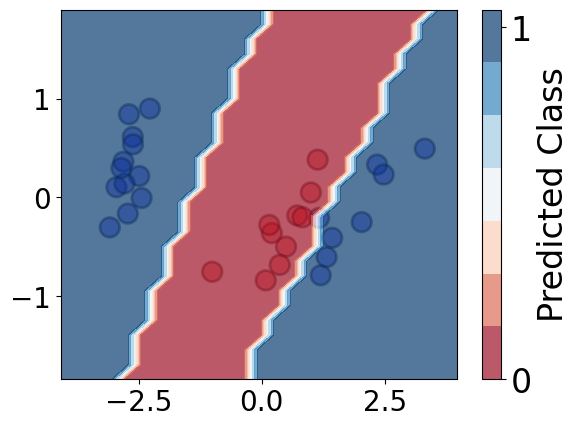

deltas


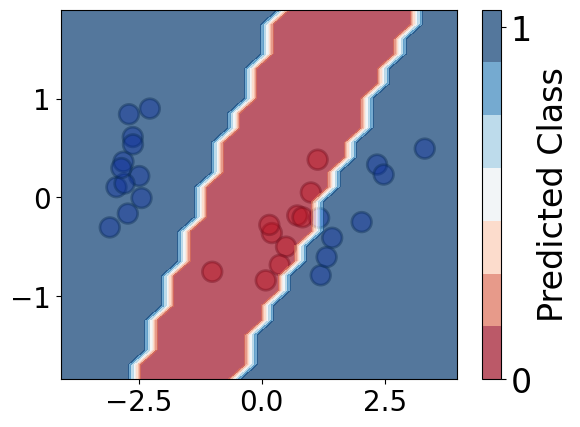

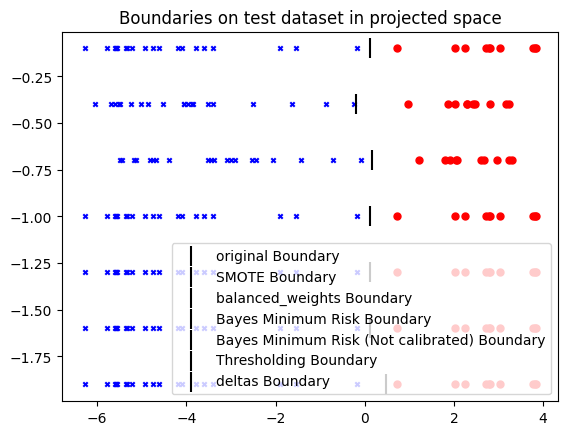

LATEX table format


\begin{tabular}{lrrrrrrrrl}
\toprule
 & accuracy & G-Mean & ROC-AUC & precision1 (red) & precision2 (blue) & precision & recall & F1 & F-score-1 \\
Method &  &  &  &  &  &  &  &  &  \\
\midrule
original & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
SMOTE & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
balanced_weights & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
Bayes Minimum Risk & 0.966667 & 0.974679 & 0.975000 & 1.000000 & 0.909091 & 1.000000 & 0.950000 & 0.952381 & [0.97435897 0.95238095] \\
Bayes Minimum Risk (Not calibrated) & 0.966667 & 0.974679 & 0.975000 & 1.000000 & 0.909091 & 1.000000 & 0.950000 & 0.952381 & [0.97435897 0.95238095] \\
Thresholding & 0.966667 & 0.974679 & 0.975000 & 1.000000 & 0.909091 & 1.000000 & 0.950000 & 0.952381 & [0.97435897 0.95238095] \\
deltas & 1.000000 & 1.000000 & 

,accuracy,G-Mean,ROC-AUC,precision1 (red),precision2 (blue),precision,recall,F1,F-score-1
Method,,,,,,,,,
original,1.000000,1.000000,1.000,1.0,1.000000,1.0,1.00,1.000000,"[1.0, 1.0]"
SMOTE,1.000000,1.000000,1.000,1.0,1.000000,1.0,1.00,1.000000,"[1.0, 1.0]"
balanced_weights,1.000000,1.000000,1.000,1.0,1.000000,1.0,1.00,1.000000,"[1.0, 1.0]"
Bayes Minimum Risk,0.966667,0.974679,0.975,1.0,0.909091,1.0,0.95,0.952381,"[0.9743589743589743, 0.9523809523809523]"
Bayes Minimum Risk (Not calibrated),0.966667,0.974679,0.975,1.0,0.909091,1.0,0.95,0.952381,"[0.9743589743589743, 0.9523809523809523]"
Thresholding,0.966667,0.974679,0.975,1.0,0.909091,1.0,0.95,0.952381,"[0.9743589743589743, 0.9523809523809523]"
deltas,1.000000,1.000000,1.000,1.0,1.000000,1.0,1.00,1.000000,"[1.0, 1.0]"


In [7]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])